# Ploting data of hospitalisation in France

Without being a methiculous study. Ploting the graph of every department allow us to see that overall there is less new cases each day

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection,linear_model

In [2]:
data=pd.read_csv("donnees-hospitalieres-covid19-2020-04-04-19h00.csv")
data=data.dropna()
data.DEP.unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '2A', '2B', '30', '31', '32', '33',
       '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44',
       '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55',
       '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66',
       '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77',
       '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88',
       '89', '90', '91', '92', '93', '94', '95', '971', '972', '973',
       '974', '976'], dtype=object)

In [3]:
D5=data.groupby("DEP").get_group("5").groupby("sexe").get_group(0)
D5.jour=pd.to_datetime(D5.jour)
D5.loc[:,"day"]=D5.jour.dt.dayofyear
D5.loc[:,"day"]=D5.day-D5.day.iloc[0]
D5

,DEP,sexe,jour,hosp,rea,rad,dc,day
12,5,0,2020-03-18,8,1,9,0,0
315,5,0,2020-03-19,10,1,10,0,1
618,5,0,2020-03-20,13,1,10,0,2
921,5,0,2020-03-21,13,1,10,0,3
1224,5,0,2020-03-22,14,1,11,0,4
1527,5,0,2020-03-23,19,3,13,0,5
1830,5,0,2020-03-24,19,4,16,1,6
2136,5,0,2020-03-25,23,4,19,1,7
2439,5,0,2020-03-26,29,6,20,1,8
2742,5,0,2020-03-27,32,7,22,1,9


In [4]:

D5.loc[:,"log of hosp"]=np.log(D5["hosp"]+1)
L5=linear_model.LinearRegression().fit(D5[["day"]],D5["log of hosp"])

W5=L5.predict(D5[["day"]])


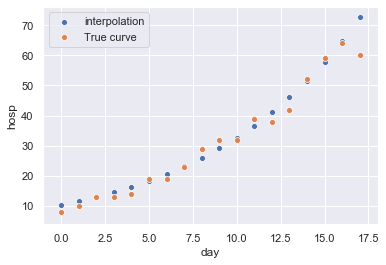

In [5]:
sns.set()
a=sns.scatterplot(x=D5.day,y=np.exp(W5),label='interpolation')
sns.scatterplot(x=D5.day,y=D5["hosp"],label='True curve')
a.legend()

In [6]:
fig,ax=plt.subplots(45,1,figsize=(20,450))
for i in range(1,45):
    if i!=20:
        D5=data.groupby("DEP").get_group("{}".format(i)).groupby("sexe").get_group(0)
        D5.jour=pd.to_datetime(D5.jour)
        D5.loc[:,"day"]=D5.jour.dt.dayofyear
        D5.loc[:,"day"]=D5.day-D5.day.iloc[0]

        D5.loc[:,"log of hosp"]=np.log(D5["hosp"]+1)
        L5=linear_model.LinearRegression().fit(D5[["day"]],D5["log of hosp"])
        W5=L5.predict(D5[["day"]])


        sns.set()
        a=sns.scatterplot(x=D5.day,y=np.exp(W5),label='interpolation',ax=ax[i-1])
        sns.scatterplot(x=D5.day,y=D5["hosp"],label='True curve',ax=ax[i-1])
        a.legend()
        a.set(title="Département : {}".format(i))

Error in callback <function flush_figures at 0x0000024C3B9269D8> (for post_execute):


KeyboardInterrupt: 

In [ ]:
fig,ax=plt.subplots(49,1,figsize=(20,490))
for i in range(45,93):

    D5=data.groupby("DEP").get_group("{}".format(i)).groupby("sexe").get_group(0)
    D5.jour=pd.to_datetime(D5.jour)
    D5.loc[:,"day"]=D5.jour.dt.dayofyear
    D5.loc[:,"day"]=D5.day-D5.day.iloc[0]

    D5.loc[:,"log of hosp"]=np.log(D5["hosp"]+1)
    L5=linear_model.LinearRegression().fit(D5[["day"]],D5["log of hosp"])
    W5=L5.predict(D5[["day"]])


    sns.set()
    a=sns.scatterplot(x=D5.day,y=np.exp(W5),label='interpolation',ax=ax[i-45])
    sns.scatterplot(x=D5.day,y=D5["hosp"],label='True curve',ax=ax[i-45])
    a.legend()
    a.set(title="Département : {}".format(i))